In [1]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import mimetypes
import pickle
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

image_width  = 200
image_height = 200

2023-09-03 22:33:52.200379: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = load_model('./3.h5')
lb = pickle.loads(open('./lb3.pickle', "rb").read())

In [3]:
def inference(imagePath):
    # load the input image (in Keras format) from disk and preprocess
    # it, scaling the pixel intensities to the range [0, 1]
    image = load_img(imagePath, target_size = (image_width, image_height))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    return model.predict(image)

In [4]:
def draw_bbox(img, boxPreds, labelPreds):
    imagez = np.copy(img)
    (h, w) = image.shape[:2]

    # predict the bounding box of the object along with the class label
    (startX, startY, endX, endY) = boxPreds[0]

    # determine the class label with the largest predicted probability
    i = np.argmax(labelPreds, axis=1)
    label = lb.classes_[i][0]

    # scale the predicted bounding box coordinates based on the image dimensions
    startX = int(startX * w)
    startY = int(startY * h)
    endX   = int(endX * w)
    endY   = int(endY * h)
    
    # draw the predicted bounding box and class label on the image
    y = startY - 10 if startY - 10 > 10 else startY + 10
    cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 255, 0), 2)
    cv2.rectangle(image, (startX, endX), (startY, endY), (0, 255, 0), 2)
    
    return image

1/1 [==============================] - 0s 113ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Label: M


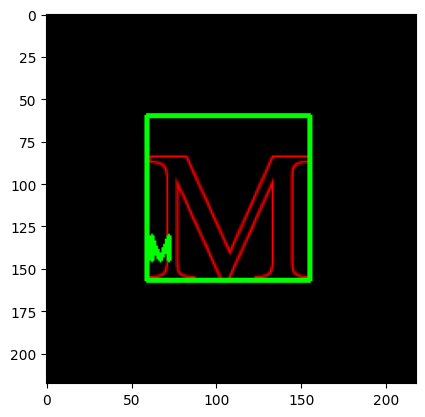

In [6]:
imagePath = './hollow_dataset/images/M/image_18.png'

image = plt.imread(imagePath)

(boxPreds, labelPreds) = inference(imagePath)
letters = list(i for i in "ABCDEFGHIJKLMNOPQRSTUVWXYZ")
print("Predicted Label:", letters[int(np.argmax(labelPreds, 1))])

image_with_bbox = draw_bbox(image, boxPreds, labelPreds)

plt.imshow(image_with_bbox)

In [12]:
# Assuming you have a function that detects letters in an image and returns bounding boxes and labels

# Load your image
imagePath = "./Sample.png"
image = plt.imread(imagePath)

# Detect letters in the image
boxPreds, labelPreds = inference(imagePath)
draw_bbox(image, boxPreds, labelPreds)

# Display or save the image with bounding boxes
cv2.imshow('Image with Bounding Boxes', image)
#cv2.imwrite('output_image.jpg', image)



1/1 [==============================] - 0s 118ms/step
